In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('AVGO_tweets.csv')

In [3]:
df.head(3)

,Unnamed: 0,Time,User,Tweet
0,0,2023-04-08 22:57:26+00:00,starks2765,RT @dividendology: Has your opinion on $SCHD c...
1,1,2023-04-08 22:52:06+00:00,jakestettey,RT @CollarEscape: @Smartnetworth1 $MSFT-(+709%...
2,2,2023-04-08 22:45:12+00:00,ssbb8888,$AVGO اللي طلبه بالخاص اشوفه سلبي نموذج سلبي و...


In [4]:
from transformers import BertTokenizer

In [5]:
model_name = 'bert-base-cased'
tokenizer = BertTokenizer.from_pretrained(model_name)

In [6]:
# Some of the common BERT tokens
print(tokenizer.sep_token, tokenizer.sep_token_id) # marker for ending of a sentence
print(tokenizer.cls_token, tokenizer.cls_token_id) # start of each sentence, so BERT knows we’re doing classification
print(tokenizer.pad_token, tokenizer.pad_token_id) # special token for padding
print(tokenizer.unk_token, tokenizer.unk_token_id) # tokens not found in training set 

[SEP] 102
[CLS] 101
[PAD] 0
[UNK] 100


In [7]:
token_lens = []

for txt in df.Tweet:
    tokens = tokenizer.encode(txt, max_length=512)
    token_lens.append(len(tokens))

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\sayed\AppData\Local\Temp\ipykernel_33840\1955974474.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(token_lens)


Text(0.5, 0, 'Token count')

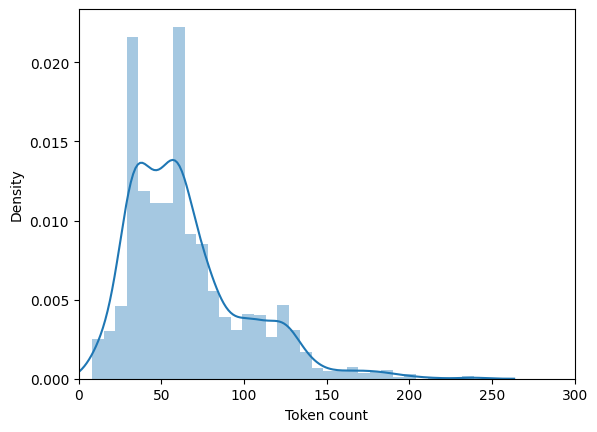

In [9]:
# plot the distribution of review lengths 
sns.distplot(token_lens)
plt.xlim([0, 300]);
plt.xlabel('Token count')

In [10]:
max_len = 270

In [11]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

In [12]:
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')
model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

In [13]:
import torch

In [14]:
def SA(comment):
    tokens = tokenizer.encode(comment, return_tensors='pt')
    result  = model(tokens)
    return int(torch.argmax(result.logits))+1

In [15]:
df['Sentiments'] = df['Tweet'].apply(lambda x: SA(x[:max_len]))

In [16]:
df = df.sort_values(by=['Time'])

In [17]:
# df = df.drop(['Unnamed: 0'], axis=1)
df = df.reset_index(drop=True)

In [18]:
df.head(3)

,Unnamed: 0,Time,User,Tweet,Sentiments
0,1527,2023-03-30 20:17:52+00:00,mcclure_trades,Elliott Wave for select stocks and ETFs: $MET...,5
1,1526,2023-03-30 20:25:03+00:00,xtrateg,📊 Resumen ESTRATEGIA: Basica1M 🅱\n\n💵 Efectivo...,3
2,1525,2023-03-30 20:33:05+00:00,day_trading_de,AVGO (Broadcom Inc.) 🚨 #Insider #stock alert! ...,1


In [19]:
df.Sentiments.value_counts()

Sentiments
5    680
1    678
3    127
4     26
2     17
Name: count, dtype: int64

In [20]:
df.tail(3)

,Unnamed: 0,Time,User,Tweet,Sentiments
1525,2,2023-04-08 22:45:12+00:00,ssbb8888,$AVGO اللي طلبه بالخاص اشوفه سلبي نموذج سلبي و...,3
1526,1,2023-04-08 22:52:06+00:00,jakestettey,RT @CollarEscape: @Smartnetworth1 $MSFT-(+709%...,1
1527,0,2023-04-08 22:57:26+00:00,starks2765,RT @dividendology: Has your opinion on $SCHD c...,1


In [21]:
start_time = df.Time[0]

In [22]:
list = [df[i:i+4] for i in range(0, len(df), 4)]

In [23]:
pred = []
time = []

In [24]:
for i in range(0, len(list)):
    avg = list[i].Sentiments.sum()/4
    t = list[0].Time[0]
    if avg in range(1,3):
        pred.append('DOWN')
        time.append(t)
    elif avg in range(4,6):
        pred.append('UP')
        time.append(t)
    elif avg == 3:
        pred.append('NEUTRAL')
        time.append(t)

In [25]:
pred[0]

'DOWN'

In [26]:
time[0]

'2023-03-30 20:17:52+00:00'

In [27]:
dict = {'Time':time, 'Predictions':pred}

In [28]:
AVGO_df = pd.DataFrame(dict)

In [29]:
AVGO_df

,Time,Predictions
0,2023-03-30 20:17:52+00:00,DOWN
1,2023-03-30 20:17:52+00:00,DOWN
2,2023-03-30 20:17:52+00:00,DOWN
3,2023-03-30 20:17:52+00:00,NEUTRAL
4,2023-03-30 20:17:52+00:00,DOWN
...,...,...
267,2023-03-30 20:17:52+00:00,UP
268,2023-03-30 20:17:52+00:00,DOWN
269,2023-03-30 20:17:52+00:00,NEUTRAL
270,2023-03-30 20:17:52+00:00,UP


In [30]:
import time

In [31]:
for i in range(0, len(AVGO_df)):
    print(f'Date & Time : {AVGO_df.Time[i]}   Prediction : {AVGO_df.Predictions[i]}')
    time.sleep(3)

Date & Time : 2023-03-30 20:17:52+00:00   Prediction : DOWN
Date & Time : 2023-03-30 20:17:52+00:00   Prediction : DOWN
Date & Time : 2023-03-30 20:17:52+00:00   Prediction : DOWN
Date & Time : 2023-03-30 20:17:52+00:00   Prediction : NEUTRAL
Date & Time : 2023-03-30 20:17:52+00:00   Prediction : DOWN
Date & Time : 2023-03-30 20:17:52+00:00   Prediction : DOWN
Date & Time : 2023-03-30 20:17:52+00:00   Prediction : NEUTRAL
Date & Time : 2023-03-30 20:17:52+00:00   Prediction : NEUTRAL
Date & Time : 2023-03-30 20:17:52+00:00   Prediction : UP
Date & Time : 2023-03-30 20:17:52+00:00   Prediction : NEUTRAL
Date & Time : 2023-03-30 20:17:52+00:00   Prediction : DOWN
Date & Time : 2023-03-30 20:17:52+00:00   Prediction : UP
Date & Time : 2023-03-30 20:17:52+00:00   Prediction : UP
Date & Time : 2023-03-30 20:17:52+00:00   Prediction : UP
Date & Time : 2023-03-30 20:17:52+00:00   Prediction : NEUTRAL
Date & Time : 2023-03-30 20:17:52+00:00   Prediction : DOWN
Date & Time : 2023-03-30 20:17:52

Date & Time : 2023-03-30 20:17:52+00:00   Prediction : DOWN
Date & Time : 2023-03-30 20:17:52+00:00   Prediction : DOWN
Date & Time : 2023-03-30 20:17:52+00:00   Prediction : DOWN
Date & Time : 2023-03-30 20:17:52+00:00   Prediction : DOWN
Date & Time : 2023-03-30 20:17:52+00:00   Prediction : NEUTRAL
Date & Time : 2023-03-30 20:17:52+00:00   Prediction : UP
Date & Time : 2023-03-30 20:17:52+00:00   Prediction : NEUTRAL
Date & Time : 2023-03-30 20:17:52+00:00   Prediction : UP
Date & Time : 2023-03-30 20:17:52+00:00   Prediction : NEUTRAL
Date & Time : 2023-03-30 20:17:52+00:00   Prediction : DOWN
Date & Time : 2023-03-30 20:17:52+00:00   Prediction : UP
Date & Time : 2023-03-30 20:17:52+00:00   Prediction : UP
Date & Time : 2023-03-30 20:17:52+00:00   Prediction : UP
Date & Time : 2023-03-30 20:17:52+00:00   Prediction : DOWN
Date & Time : 2023-03-30 20:17:52+00:00   Prediction : DOWN
Date & Time : 2023-03-30 20:17:52+00:00   Prediction : NEUTRAL
Date & Time : 2023-03-30 20:17:52+00:0